## Trabalho Final de Disciplica - Introdução a Processamento de Dados



#### ---------------------------------------------------------------------------------------------------------------------------------------------

### Instruções:
##### O objetivo deste trabalho é processar os dados do Enem 2023, salvar os resultados em um banco de dados PostgreSQL, consultar esses dados utilizando Pandas (Python) e responder a um conjunto de perguntas analíticas.
#### Passos para Execução

1. Download dos Dados
Baixe o arquivo de microdados do Enem 2023 no link abaixo:

[Microdados Enem 2023 - INEP](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem)

Utilize o dicionário de dados disponível no site para entender o significado de cada coluna.

2. Processamento dos Dados
Realize o tratamento necessário nos dados, como:

Limpeza (remoção de valores ausentes ou inconsistentes)

Seleção de colunas relevantes

Conversão de tipos de dados, se necessário

Descreva brevemente os principais tratamentos realizados.

3. Armazenamento no Banco de Dados
Salve os dados tratados em um banco de dados PostgreSQL.

Documente:

O nome do banco de dados e das tabelas utilizadas

O método/ferramenta utilizada para realizar a carga (por exemplo: script Python, Pandas, PgAdmin, etc.)

4. Consulta e Análise com Pandas
Utilize a biblioteca Pandas (Python) para consultar os dados diretamente do banco de dados.

Responda às perguntas analíticas fornecidas utilizando funções do Pandas.

Apresente as respostas juntamente com o código utilizado para obtê-las.



## =====================================================

#### Import csv

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc

In [3]:
df = pd.read_csv(r"C:\Users\Maria\Desktop\portifolio\microdados_enem_2023\DADOS\MICRODADOS_ENEM_2023.csv", encoding='latin1',sep=';')

### Tratamento dos dados

In [4]:
# 10 primeiras linhas
df.head(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A
5,210058061539,2023,6,F,1,3,1,1,0,1,...,B,A,A,B,A,A,C,A,A,B
6,210059855122,2023,11,F,1,3,1,1,12,1,...,B,A,A,B,A,B,B,A,A,B
7,210058387333,2023,11,M,1,3,1,1,12,1,...,B,A,A,A,A,A,B,A,B,B
8,210059085137,2023,5,F,1,2,1,1,1,1,...,B,A,A,B,A,A,C,A,A,B
9,210060801601,2023,11,M,1,1,1,1,8,1,...,B,A,B,C,B,A,C,A,B,B


In [5]:
#colunas da base de dados
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [6]:
#tipo de dado de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933955 entries, 0 to 3933954
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [7]:
#tamanho do dataframe
df.shape

(3933955, 76)

In [8]:
#decidi manter apenas as colunas que eu precisava para responder as questões
df = df[['TP_FAIXA_ETARIA','TP_SEXO','TP_ESCOLA','Q001','Q002','Q006','TP_PRESENCA_LC','TP_PRESENCA_MT','NU_NOTA_MT','NU_NOTA_REDACAO']]

In [ ]:
#fiz as substituições e decidi manter todas as variáveis categóricas
df['TP_FAIXA_ETARIA'] = df['TP_FAIXA_ETARIA'].map({
    1: '< 17',
    2: '17',
    3: '18',
    4: '19',
    5: '20',
    6: '21',
    7: '22',
    8: '23',
    9: '24',
    10: '25',
    11: 'Entre 26 e 30',
    12: 'Entre 31 e 35',
    13: 'Entre 36 e 40',
    14: 'Entre 41 e 45',
    15: 'Entre 46 e 50',
    16: 'Entre 51 e 55',
    17: 'Entre 56 e 60',
    18: 'Entre 61 e 65',
    19: 'Entre 66 e 70',
    20: '> 70'
})


In [10]:
df['TP_SEXO'] = df['TP_SEXO'].map({
    'M': 'Masculino',
    'F': 'Feminino'
})

In [11]:
df['TP_ESCOLA'] = df['TP_ESCOLA'].map({
    1: 'Não Respondeu',
    2: 'Pública',
    3: 'Privada'
})

In [12]:
df['Q001'] = df['Q001'].map({
    'A': 'Nunca estudou',
    'B': '4ª série/5º ano incompletos',
    'C': '4ª série/5º ano completos',
    'D': '8ª série/9º ano completos',
    'E': 'Ensino Médio completo',
    'F': 'Faculdade completo',
    'G': 'Pós-graduação completo',
    'H': 'Não sei'
})

In [13]:
df['Q002'] = df['Q002'].map({
    'A': 'Nunca estudou',
    'B': '4ª série/5º ano incompletos',
    'C': '4ª série/5º ano completos',
    'D': '8ª série/9º ano completos',
    'E': 'Ensino Médio completo',
    'F': 'Faculdade completo',
    'G': 'Pós-graduação completo',
    'H': 'Não sei'
})

In [14]:
df['Q006'] = df['Q006'].map({
    'A': 'Nenhuma Renda',
    'B': 'Até R$ 1.320,00',
    'C': 'De R$ 1.320,01 até R$ 1.980,00',
    'D': 'De R$ 1.980,01 até R$ 2.640,00',
    'E': 'De R$ 2.640,01 até R$ 3.300,0',
    'F': 'De R$ 3.300,01 até R$ 3.960,0',
    'G': 'De R$ 3.960,01 até R$ 5.280,00',
    'H': 'De R$ 5.280,01 até R$ 6.600,00',
    'I': 'De R$ 6.600,01 até R$ 7.920,00',
    'J': 'De R$ 7.920,01 até R$ 9240,00',
    'K': 'De R$ 9.240,01 até R$ 10.560,00',
    'L': 'De R$ 10.560,01 até R$ 11.880,00',
    'M': 'De R$ 11.880,01 até R$ 13.200,00',
    'N': 'De R$ 13.200,01 até R$ 15.840,00',
    'O': 'De R$ 15.840,01 até R$19.800,00',
    'P': 'De R$ 19.800,01 até R$ 26.400,00',
    'Q': 'Acima de R$ 26.400,0'
})

In [15]:
df['TP_PRESENCA_LC'] = df['TP_PRESENCA_LC'].map({
    0: 'Faltou',
    1: 'Presente',
    2: 'Eliminado'
})

In [16]:
df['TP_PRESENCA_MT'] = df['TP_PRESENCA_MT'].map({
    0: 'Faltou',
    1: 'Presente',
    2: 'Eliminado'
})

In [17]:
df.rename(columns={'TP_FAIXA_ETARIA': 'FAIXA_ETARIA',
                   'TP_SEXO': 'SEXO',
                   'TP_ESCOLA':'ESCOLA',
                   'Q001': 'ESCOLARIDADE_PAI',
                   'Q002': 'ESCOLARIDADE_MAE',
                   'Q006': 'RENDA_FAMILIAR',
                   'TP_PRESENCA_LC': 'PRESENCA_LC',
                   'TP_PRESENCA_MT': 'PRESENCA_MT',
                   'NU_NOTA_MT': 'NOTA_MT',
                   'NU_NOTA_REDACAO': 'NOTA_REDACAO'
                   }, inplace=True)

### Insert no Banco de Dados

In [18]:
#salvar dataframe transformado em csv
pd.DataFrame.to_csv(df, r"C:\Users\Maria\Desktop\portifolio\microdados_enem_2023\ENEM_2023.csv", index=False, encoding='utf-8-sig')

In [19]:
DF = pd.read_csv(r"C:\Users\Maria\Desktop\portifolio\microdados_enem_2023\ENEM_2023.csv")

In [20]:
DF.head()

,FAIXA_ETARIA,SEXO,ESCOLA,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,RENDA_FAMILIAR,PRESENCA_LC,PRESENCA_MT,NOTA_MT,NOTA_REDACAO
0,Entre 41 e 45,Masculino,Não Respondeu,Nunca estudou,Faculdade completo,"De R$ 3.300,01 até R$ 3.960,0",Faltou,Faltou,NaN,NaN
1,Entre 31 e 35,Masculino,Não Respondeu,Faculdade completo,Ensino Médio completo,"De R$ 5.280,01 até R$ 6.600,00",Faltou,Faltou,NaN,NaN
2,21,Feminino,Não Respondeu,Não sei,Ensino Médio completo,"De R$ 1.320,01 até R$ 1.980,00",Presente,Presente,363.2,700.0
3,17,Feminino,Pública,8ª série/9º ano completos,8ª série/9º ano completos,"De R$ 1.320,01 até R$ 1.980,00",Presente,Presente,466.7,880.0
4,18,Feminino,Pública,4ª série/5º ano incompletos,4ª série/5º ano incompletos,"Até R$ 1.320,00",Presente,Presente,338.3,560.0


### Recuperação dos dados usando Pandas

In [2]:
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=localhost;'  
    'DATABASE=ENEM_2023;'
    'Trusted_Connection=yes;'  
)

# Consulta
query = "SELECT * FROM ENEM_2023"

# dataframe no pandas
df_sql = pd.read_sql(query, conn)

In [3]:
#mesmo importando os dados no SQLServer com utf-8, os dados estão com problema na formatação
#estou corrigindo a formatação manualmente
for col in df_sql.columns:
    if df_sql[col].dtype == 'object': 
        df_sql[col] = df_sql[col].apply(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)

In [5]:
#formatação corrigida
df_sql.head(10)

,FAIXA_ETARIA,SEXO,ESCOLA,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,RENDA_FAMILIAR,PRESENCA_LC,PRESENCA_MT,NOTA_MT,NOTA_REDACAO
0,Entre 41 e 45,Masculino,Não Respondeu,Nunca estudou,Faculdade completo,"De R$ 3.300,01 até R$ 3.960,0",Faltou,Faltou,0.0,0.0
1,Entre 31 e 35,Masculino,Não Respondeu,Faculdade completo,Ensino Médio completo,"De R$ 5.280,01 até R$ 6.600,00",Faltou,Faltou,0.0,0.0
2,21,Feminino,Não Respondeu,Não sei,Ensino Médio completo,"De R$ 1.320,01 até R$ 1.980,00",Presente,Presente,3632.0,7000.0
3,17,Feminino,Pública,8ª série/9º ano completos,8ª série/9º ano completos,"De R$ 1.320,01 até R$ 1.980,00",Presente,Presente,4667.0,8800.0
4,18,Feminino,Pública,4ª série/5º ano incompletos,4ª série/5º ano incompletos,"Até R$ 1.320,00",Presente,Presente,3383.0,5600.0
5,21,Feminino,Não Respondeu,Ensino Médio completo,Ensino Médio completo,"De R$ 1.320,01 até R$ 1.980,00",Faltou,Faltou,0.0,0.0
6,Entre 26 e 30,Feminino,Não Respondeu,4ª série/5º ano completos,4ª série/5º ano completos,"De R$ 1.320,01 até R$ 1.980,00",Faltou,Faltou,0.0,0.0
7,Entre 26 e 30,Masculino,Não Respondeu,4ª série/5º ano incompletos,4ª série/5º ano incompletos,Nenhuma Renda,Faltou,Faltou,0.0,0.0
8,20,Feminino,Não Respondeu,Ensino Médio completo,Ensino Médio completo,"De R$ 1.320,01 até R$ 1.980,00",Faltou,Faltou,0.0,0.0
9,Entre 26 e 30,Masculino,Não Respondeu,Não sei,Ensino Médio completo,"De R$ 3.300,01 até R$ 3.960,0",Presente,Presente,6802.0,6000.0


### Perguntas:

#### 1 - Qual o percentual de faltas dos candidatos na disciplina de Matemática e Redação?

In [ ]:
# dataframe com as porcetagens de falta
falta_porc = pd.DataFrame({
    'Matemática': [f"{round((df_sql['PRESENCA_MT'] == 'Faltou').mean() * 100, 2)}%"],
    'Redação': [f"{round((df_sql['PRESENCA_LC'] == 'Faltou').mean() * 100, 2)}%"]
})

In [18]:
falta_porc

,Matemática,Redação
0,31.5%,28.13%


#### 2 - Se formos olhar para a distribuição das idades dos alunos, como estaria a distribuição dos alunos por faixas etárias?

In [5]:
contagem = df_sql['FAIXA_ETARIA'].value_counts().sort_values()

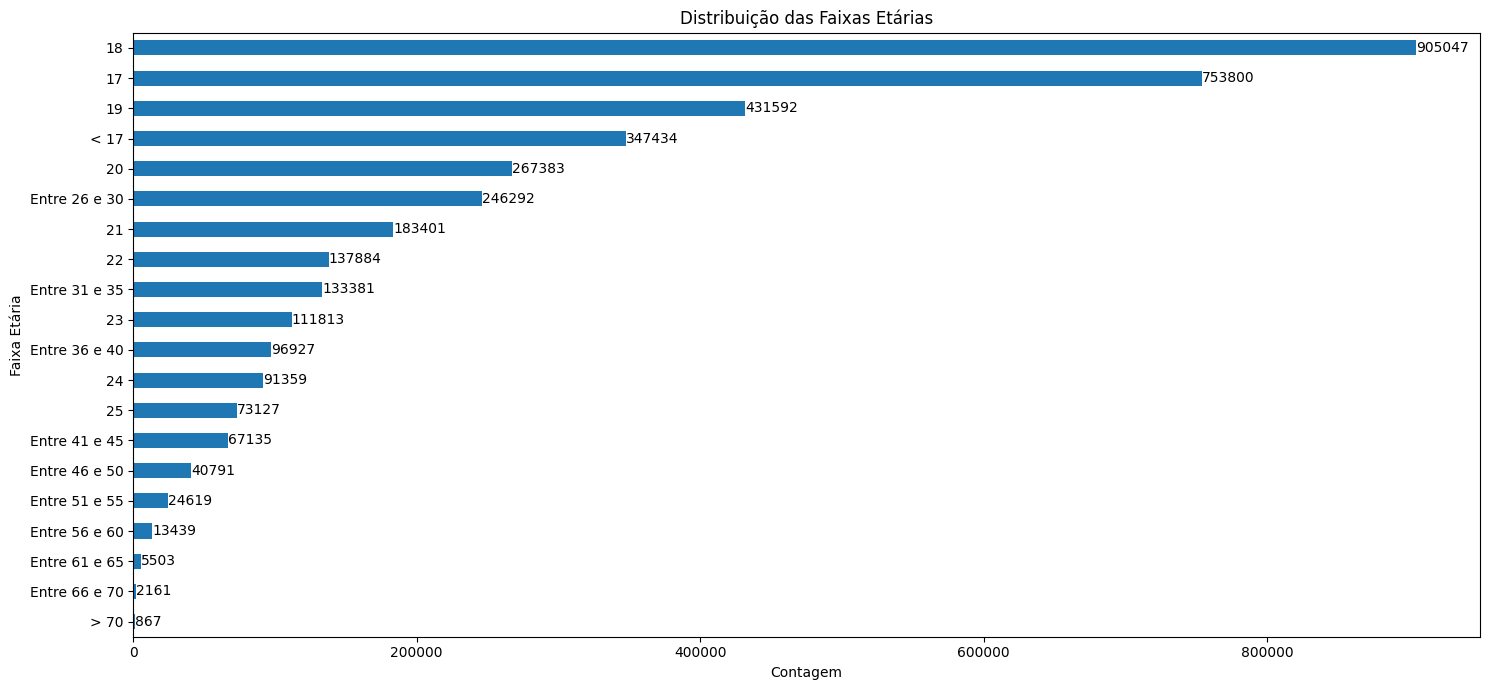

In [10]:
contagem.plot.barh(figsize=(15, 7))

for i, (valor, qtd) in enumerate(contagem.items()):
    plt.text(qtd + 1, i, str(qtd), va='center')

plt.xlabel('Contagem')
plt.ylabel('Faixa Etária')
plt.title('Distribuição das Faixas Etárias')
plt.tight_layout()
plt.show()

### 3 - Quem tem as melhores notas em matemática e redação, candidatos do sexo masculino ou feminino?

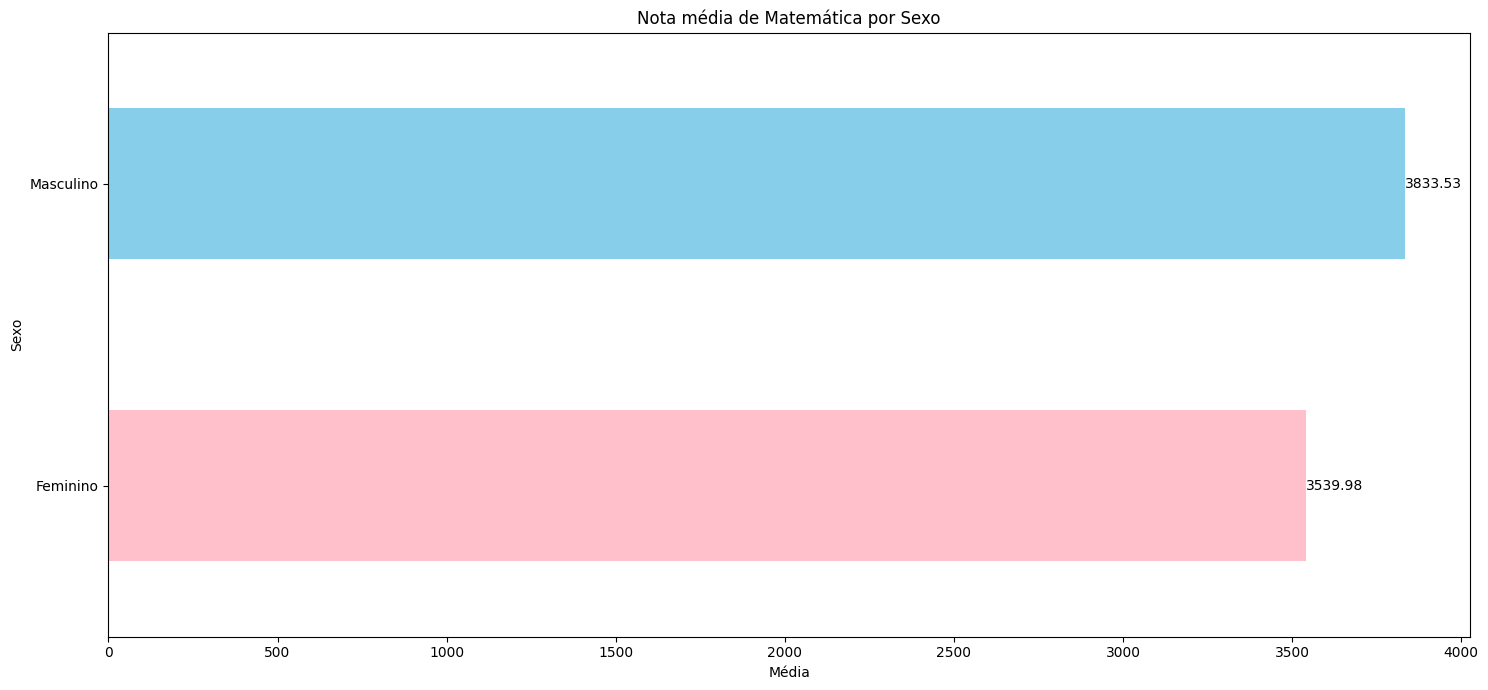

In [11]:
contagem_mat = round(df_sql.groupby('SEXO')['NOTA_MT'].mean().sort_values(),2)
cores = ['pink','skyblue']

contagem_mat.plot.barh(figsize=(15, 7), color=cores)

for i, (valor, qtd) in enumerate(contagem_mat.items()):
    plt.text(qtd + 1, i, str(qtd), va='center')

plt.xlabel('Média')
plt.ylabel('Sexo')
plt.title('Nota média de Matemática por Sexo')
plt.tight_layout()
plt.show()

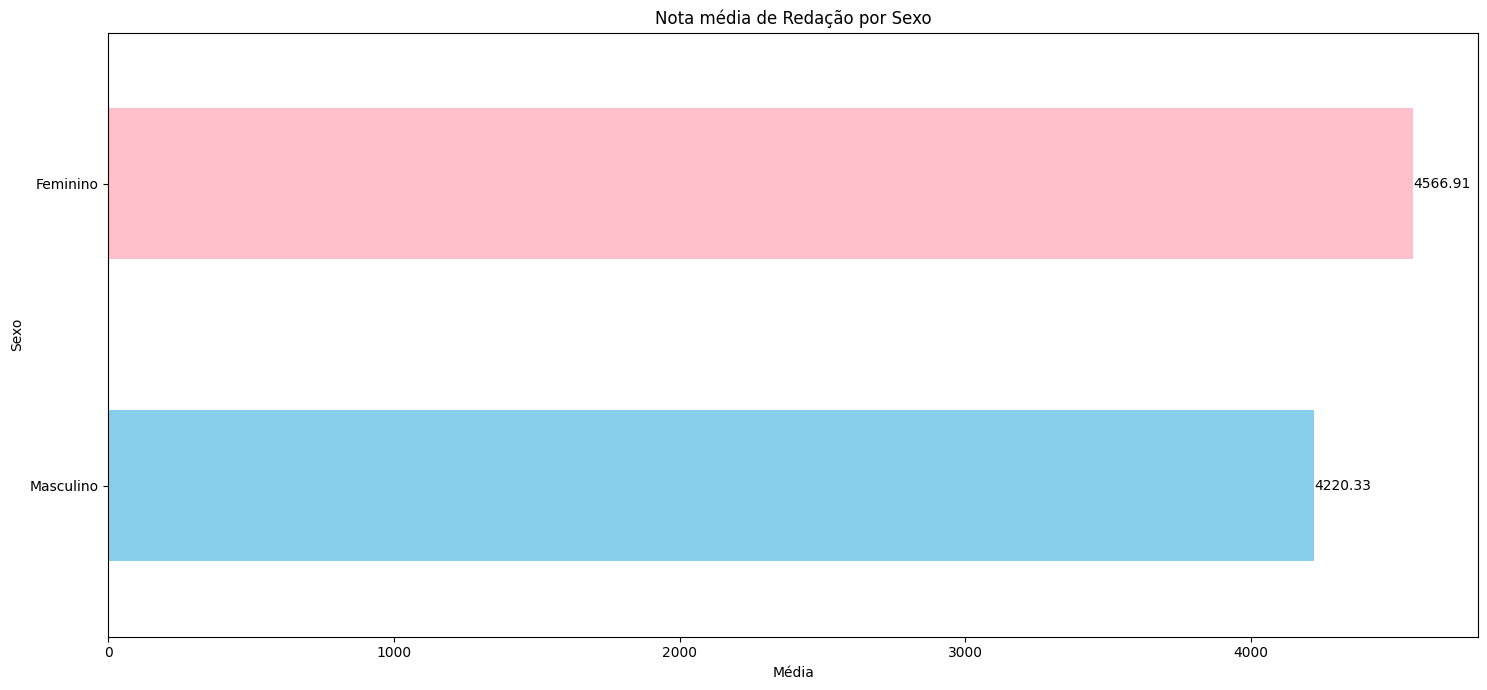

In [13]:
contagem_redacao = round(df_sql.groupby('SEXO')['NOTA_REDACAO'].mean().sort_values(),2)
cores = ['skyblue','pink']

contagem_redacao.plot.barh(figsize=(15, 7), color=cores)

for i, (valor, qtd) in enumerate(contagem_redacao.items()):
    plt.text(qtd + 1, i, str(qtd), va='center')

plt.xlabel('Média')
plt.ylabel('Sexo')
plt.title('Nota média de Redação por Sexo')
plt.tight_layout()
plt.show()

### 4 - Há alguma influência no tipo da escola (publica e privada) nas notas de matemática e redação?

In [ ]:
'''como é uma correlação entre variáveis numéricas (notas) e categóricas (renda, escolaridade e tipo de escola), decidi fazer alguns
boxplots para a visualização da distribuição'''

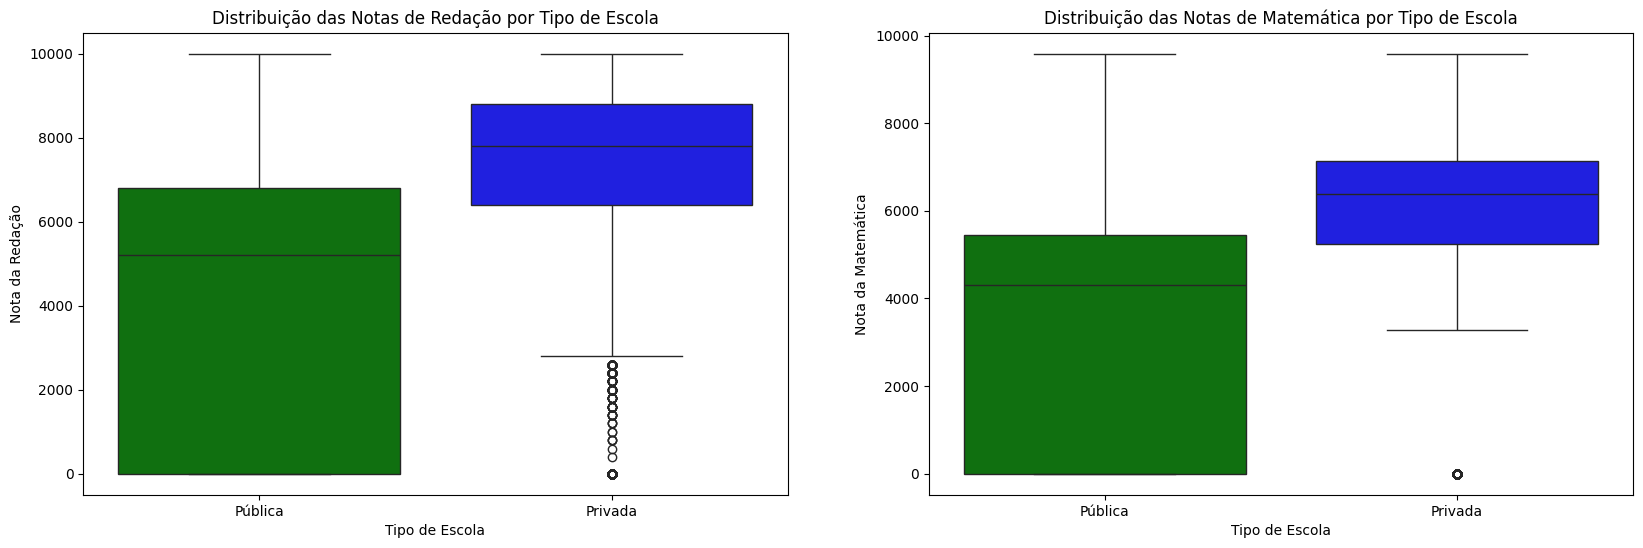

In [46]:
filtro_escola = df_sql[df_sql['ESCOLA'] != 'Não Respondeu']
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
palette = ['g', 'b']

sns.boxplot(y='NOTA_REDACAO', x='ESCOLA',data=filtro_escola, palette=palette,ax=axes[0])
axes[0].set_title("Distribuição das Notas de Redação por Tipo de Escola")
axes[0].set_ylabel("Nota da Redação")
axes[0].set_xlabel("Tipo de Escola")

sns.boxplot(y='NOTA_MT', x='ESCOLA',data=filtro_escola, palette=palette,ax=axes[1])
axes[1].set_title("Distribuição das Notas de Matemática por Tipo de Escola")
axes[1].set_ylabel("Nota da Matemática")
axes[1].set_xlabel("Tipo de Escola")

plt.show()

### 5 - Qual a influência da escolaridade do Pai nas notas de Matemática e Redação? 

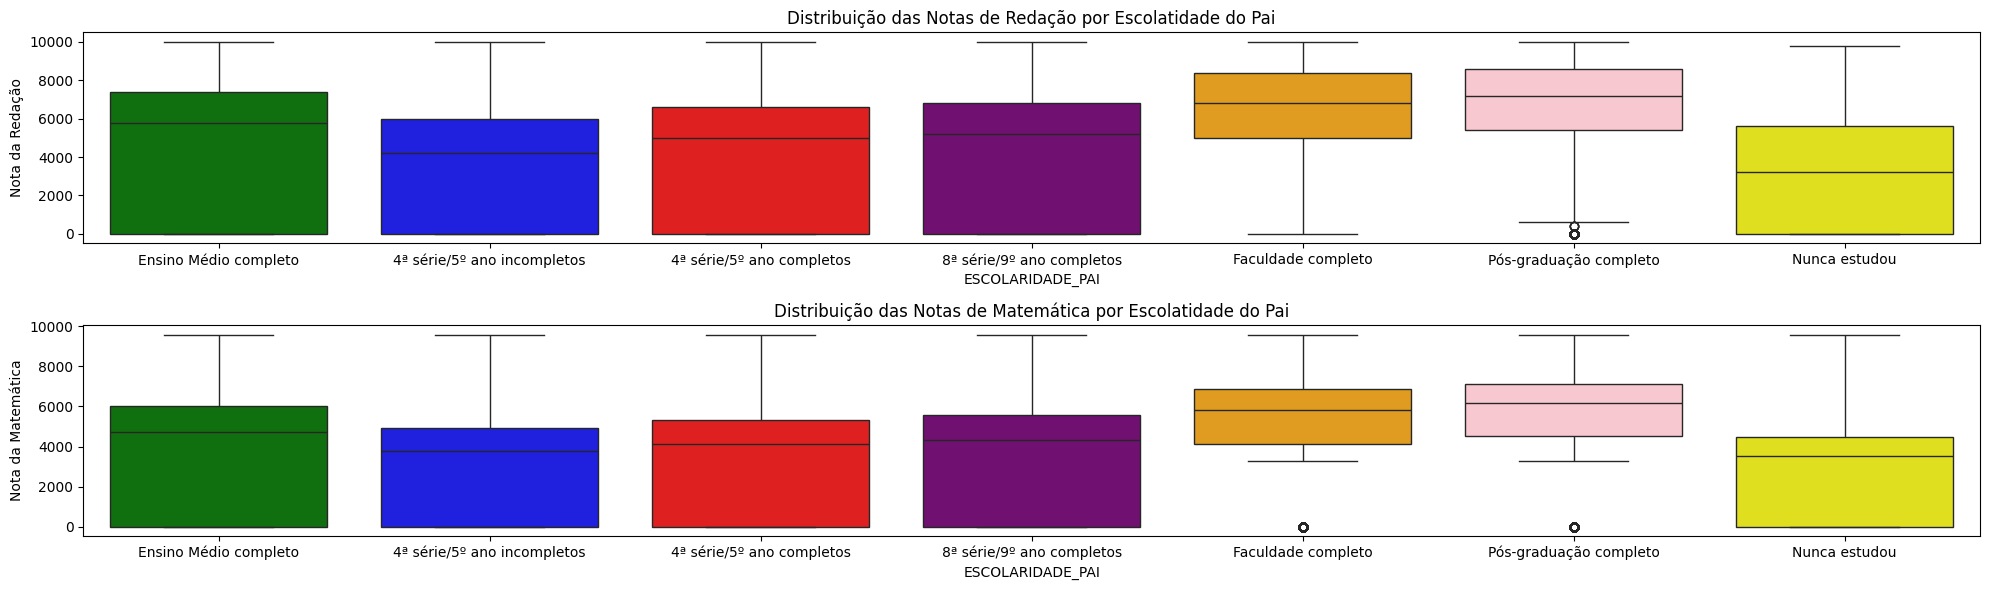

In [10]:
filtro_esc_pai = df_sql[df_sql['ESCOLARIDADE_PAI'] != 'Não sei']
fig, axes = plt.subplots(2,1, figsize=(20, 6))
palette = ['green', 'blue', 'red', 'purple', 'orange', 'pink', 'yellow']
ordem_escolaridade = filtro_esc_pai['ESCOLARIDADE_PAI'].value_counts().index.tolist()

sns.boxplot(y='NOTA_REDACAO', x='ESCOLARIDADE_PAI',data=filtro_esc_pai, palette=palette,ax=axes[0], order=ordem_escolaridade)
axes[0].set_title("Distribuição das Notas de Redação por Escolatidade do Pai")
axes[0].set_ylabel("Nota da Redação")

sns.boxplot(y='NOTA_MT', x='ESCOLARIDADE_PAI',data=filtro_esc_pai, palette=palette,ax=axes[1], order=ordem_escolaridade)
axes[1].set_title("Distribuição das Notas de Matemática por Escolatidade do Pai")
axes[1].set_ylabel("Nota da Matemática")

plt.tight_layout()
plt.show()

### 6 - Qual a influência da escolaridade do Mãe nas notas de Matemática e Redação? 

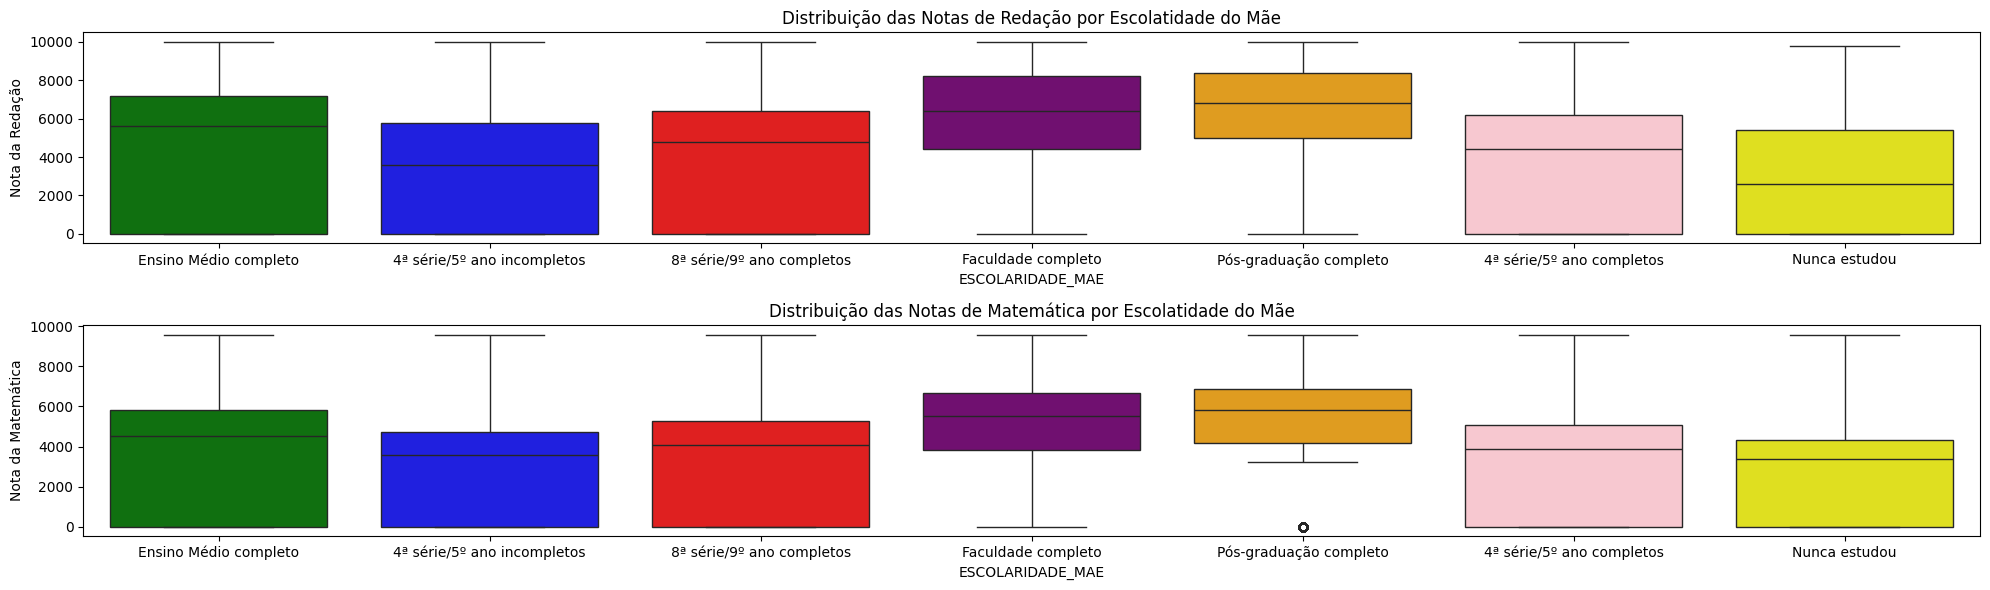

In [23]:
filtro_esc_mae = df_sql[df_sql['ESCOLARIDADE_MAE'] != 'Não sei']
fig, axes = plt.subplots(2,1, figsize=(20, 6))
palette = ['green', 'blue', 'red', 'purple', 'orange', 'pink', 'yellow']
ordem_escolaridade = filtro_esc_mae['ESCOLARIDADE_MAE'].value_counts().index.tolist()

sns.boxplot(y='NOTA_REDACAO', x='ESCOLARIDADE_MAE',data=filtro_esc_mae, palette=palette,ax=axes[0], order=ordem_escolaridade)
axes[0].set_title("Distribuição das Notas de Redação por Escolatidade do Mãe")
axes[0].set_ylabel("Nota da Redação")

sns.boxplot(y='NOTA_MT', x='ESCOLARIDADE_MAE',data=filtro_esc_mae, palette=palette,ax=axes[1], order=ordem_escolaridade)
axes[1].set_title("Distribuição das Notas de Matemática por Escolatidade do Mãe")
axes[1].set_ylabel("Nota da Matemática")

plt.tight_layout()
plt.show()

### 7 - Qual a influência da renda do Pai e da Mãe nas notas de Matemática e Redação? 

In [ ]:
#precisei agrupar as rendas para colocar no boxplot
def agrupar_renda(renda):
    if 'Nenhuma Renda' in renda:
        return 'Nenhuma Renda'
    if 'Até R$ 1.320,00' in renda or 'De R$ 1.320,01 até R$ 1.980,00' in renda or 'De R$ 1.980,01 até R$ 2.640,00' in renda or 'De R$ 2.640,01 até R$ 3.300,0' in renda: 
        return 'Até R$ 3.300,0'
    if 'De R$ 3.300,01 até R$ 3.960,0' in renda or 'De R$ 3.960,01 até R$ 5.280,00' in renda or 'De R$ 5.280,01 até R$ 6.600,00' in renda or 'De R$ 6.600,01 até R$ 7.920,00' in renda: 
        return 'Entre R$ 3.300,1 e R$ 7.920,00'
    if 'De R$ 7.920,01 até R$ 9240,00' in renda or 'De R$ 9.240,01 até R$ 10.560,00' in renda or 'De R$ 10.560,01 até R$ 11.880,00' in renda or 'De R$ 11.880,01 até R$ 13.200,00' in renda: 
        return 'Entre R$ 7.920,1 e R$ 13.200,00'
    else: 
        return 'Acima de R$ 13.200,01'

df_sql['RENDA_AGRUPADA'] = df_sql['RENDA_FAMILIAR'].apply(agrupar_renda)

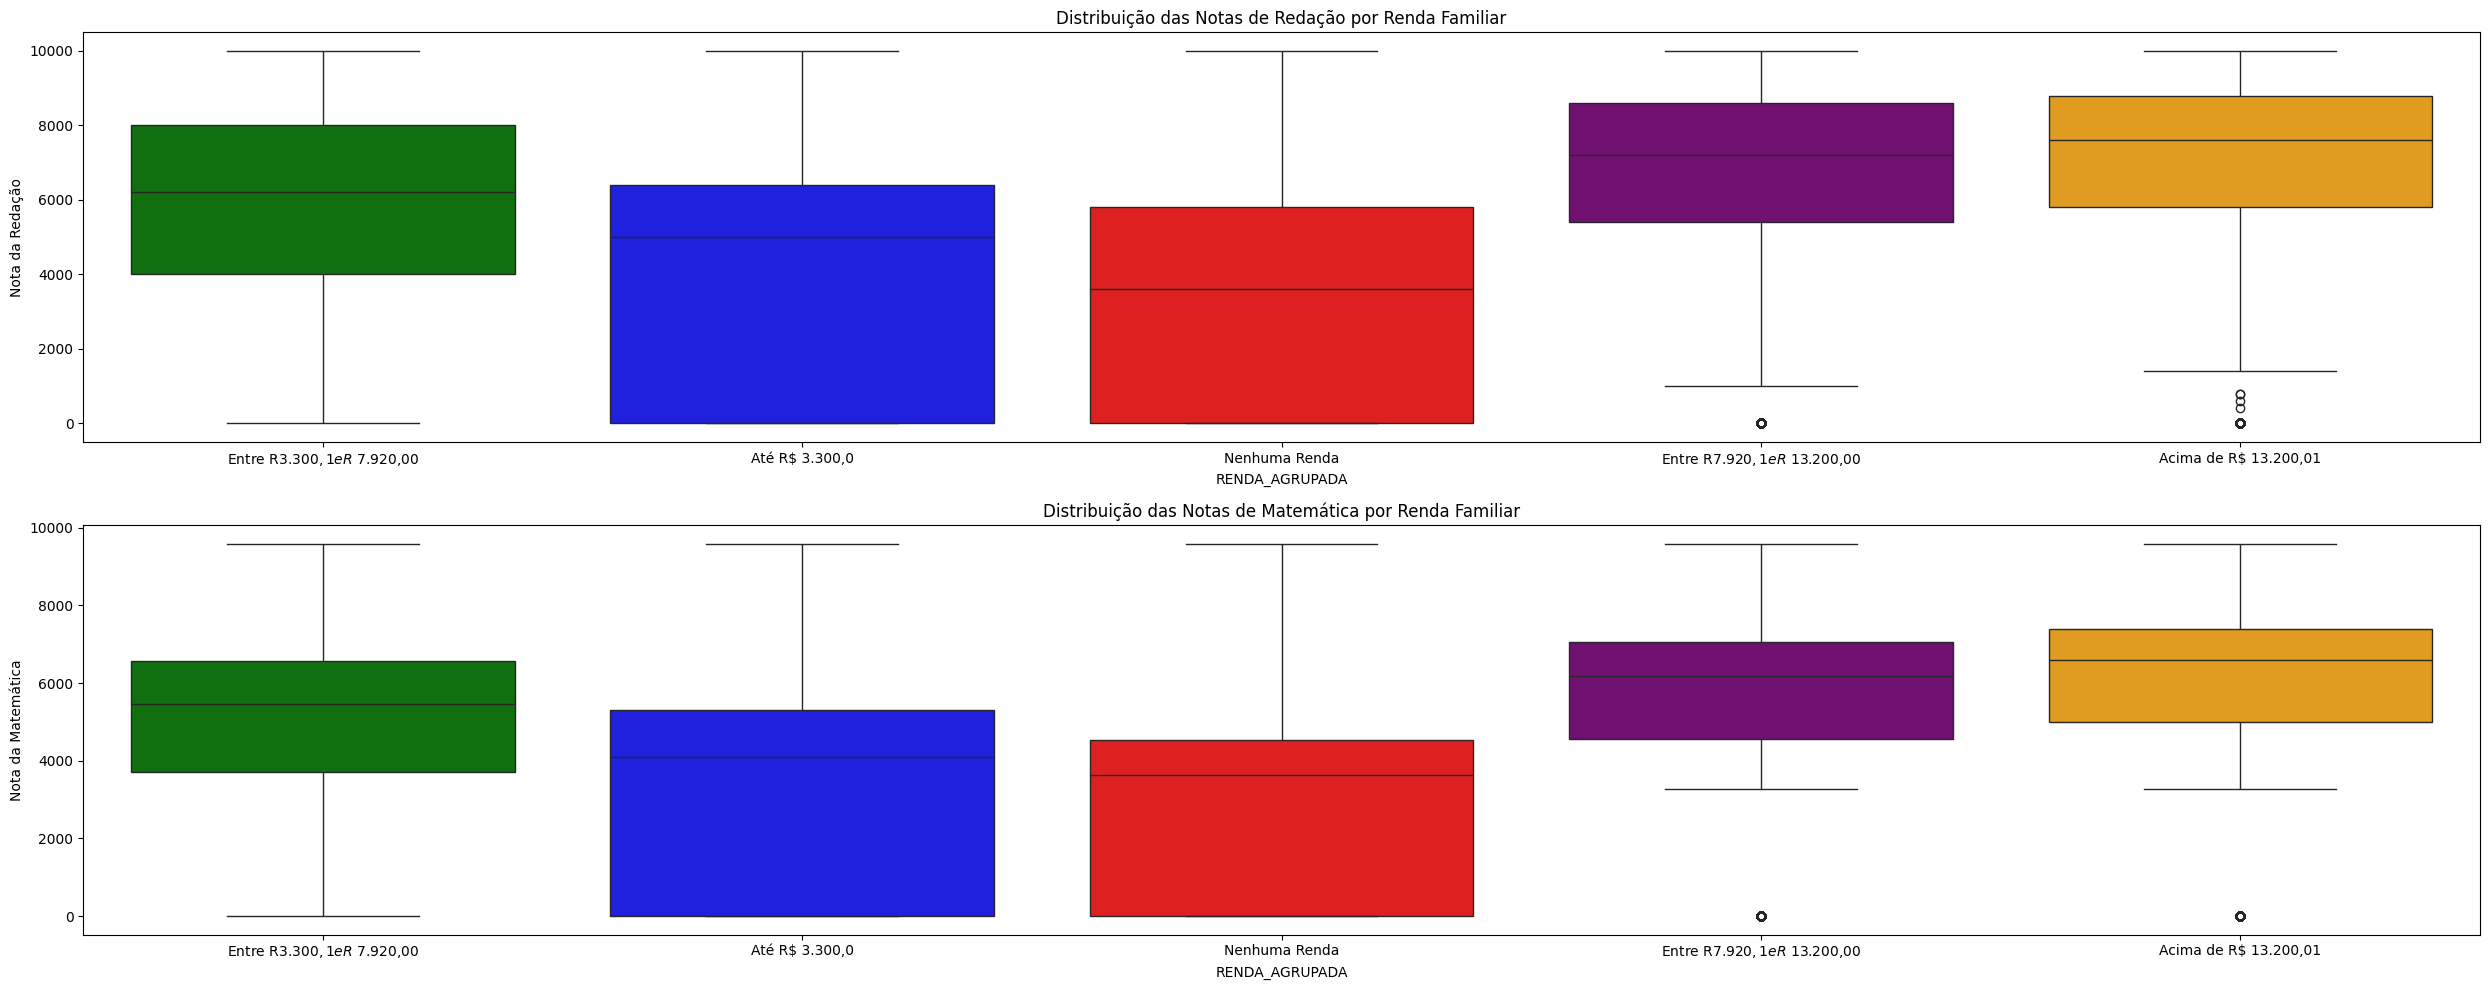

In [41]:
fig, axes = plt.subplots(2,1, figsize=(25, 10))
palette = ['green', 'blue', 'red', 'purple', 'orange', 'pink', 'yellow']

sns.boxplot(y='NOTA_REDACAO', x='RENDA_AGRUPADA', data =df_sql,  palette=palette,ax=axes[0])
axes[0].set_title("Distribuição das Notas de Redação por Renda Familiar")
axes[0].set_ylabel("Nota da Redação")

sns.boxplot(y='NOTA_MT',x='RENDA_AGRUPADA', data =df_sql, palette=palette,ax=axes[1])
axes[1].set_title("Distribuição das Notas de Matemática por Renda Familiar")
axes[1].set_ylabel("Nota da Matemática")

plt.tight_layout()
plt.show()